In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [71]:
class Polynomial:
    def __init__(self, elements):
        self.elements = list(elements)
        self.degree = len(self.elements) - 1
    
    def __str__(self):
        return "Coefficients of the polynomial are:\n" + ' '.join(map(str, self.elements))
    
    def __add__(self, other):
        self.elements += [0] * (len(other.elements) - len(self.elements))
        other.elements += [0] * (len(self.elements) - len(other.elements))
        
        result_elements = [x + y for x, y in zip(self.elements, other.elements)]
        return Polynomial(result_elements)
    
    def __sub__(self, other):
        self.elements += [0] * (len(other.elements) - len(self.elements))
        other.elements += [0] * (len(self.elements) - len(other.elements))
        
        result_elements = [x - y for x, y in zip(self.elements, other.elements)]
        return Polynomial(result_elements)
    
    def __mul__(self, scalar):

        if type(scalar) == Polynomial:
            result_elements = [0] * (len(self.elements) + len(scalar.elements) - 1)
            for i, x in enumerate(self.elements):
                for j, y in enumerate(scalar.elements):
                    result_elements[i + j] += x * y
        else:
            result_elements = [x * scalar for x in self.elements]
            
        return Polynomial(result_elements)
    
    def __rmul__(self, scalar):
        return self.__mul__(scalar)
    
    def __getitem__(self, x):
        result = 0
        for i, coeff in enumerate(self.elements):
            result += coeff * (x ** i)
        return result

    
    def show(self, a, b):
        # Generate x values in the interval [a, b]
        x = np.linspace(a, b, 100)

        # Evaluate the polynomial for each x value
        y = [self[x_val] for x_val in x]

        def generate_polynomial(self):

            result = ""
            op = ""
            for i, coeff in enumerate(self.elements):
                coeff = round(coeff)
                if coeff == 0:
                    continue
                op = " - " if coeff < 0 else " + "
                result += (op if result != "" else "") + (str(coeff) if abs(coeff) != 1 or i == 0 else "") + ("x" + ("^" if i != 1 else "") + (str(i) if i != 1 else "") if i != 0 else "") 
            return result
    

        p_x = generate_polynomial(self) 
        if p_x == "":
            p_x = "0"

        # Plot the polynomial
        plt.plot(x, y)
        plt.xlabel('$x$')
        plt.ylabel('$P(x)$')
        plt.title(f"Plot of the polynomial ${p_x}$")
        plt.grid(True)
        plt.show()


In [72]:
def bestFitPoly(Points:list[tuple], n):
    A = []
    C = []
    for j in range(n+1):
        A.append(list())
        sum = 0
        for x,y in Points:
            sum += (y*(x**j))
        C.append(sum)
        for k in range(n+1):
            sum = 0
            for x,_ in Points:
                sum += x**(j+k)
            A[-1].append(sum)

    coeff = np.linalg.solve(A,C)
    p = Polynomial(coeff)
    x = [x for x,_ in Points]
    y = [y for _,y in Points]
    plt.scatter(x,y,color='r')
    p.show(min(x),max(x))

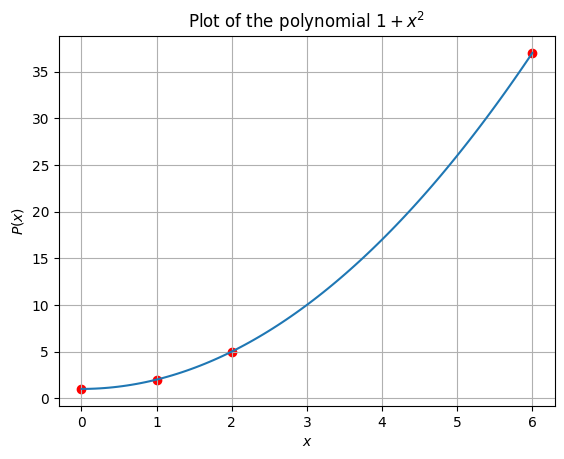

In [73]:
bestFitPoly([(0,1),(1,2),(2,5),(6,37)],2)